In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
apples_data = np.random.multivariate_normal(mean=[5,7],cov=[[1.0,0.5],[0.5,1.2]],size=1000)
# print(apples_data)

In [21]:
oranges_data = np.random.multivariate_normal(mean=[10,12],cov=[[2.0,-1.5],[-1.5,1.0]],size=900)
# print(oranges_data)

In [22]:
print(apples_data[:5,:])

[[5.24656888 5.82420244]
 [5.63793728 7.14381072]
 [5.86927141 6.91460527]
 [4.32420846 6.58898109]
 [5.13983152 6.24877818]]


In [23]:
print(oranges_data[:5,:])

[[ 8.59182581 13.02871028]
 [13.13988377  9.44769935]
 [ 7.55890998 14.23991683]
 [ 9.74173302 12.12558246]
 [10.81939676 11.49086267]]


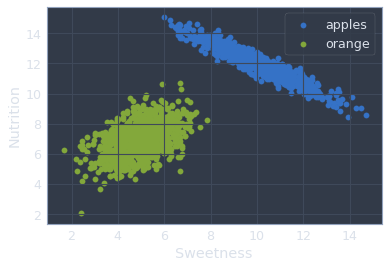

In [24]:
plt.scatter(oranges_data[:,0],oranges_data[:,1],label="apples")
plt.scatter(apples_data[:,0],apples_data[:,1],label="orange")
plt.xlabel("Sweetness")
plt.ylabel("Nutrition")
plt.legend()
plt.show()

## Data preparation

In [25]:
total_fruits = apples_data.shape[0] + oranges_data.shape[0]

In [26]:
print(total_fruits)

1900


In [27]:
X = np.zeros((total_fruits,3))
print(X.shape)

(1900, 3)


In [28]:
X[:1000,:-1] = apples_data
X[1000:,:-1] = oranges_data
X[1000:,-1] = 1

In [29]:
print(X)

[[ 5.24656888  5.82420244  0.        ]
 [ 5.63793728  7.14381072  0.        ]
 [ 5.86927141  6.91460527  0.        ]
 ...
 [12.19422099 10.44483818  1.        ]
 [ 8.24374403 13.38392637  1.        ]
 [10.69420266 11.49492012  1.        ]]


In [37]:
X_Values = X[:,:-1]
Y_Values = X[:,-1]
print(X_Values.shape)

(1900, 2)


In [39]:
test_fruit = np.array([7,11])

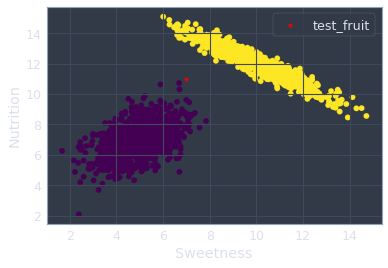

In [51]:
plt.scatter(test_fruit[0],test_fruit[1],color="red",marker="*",label="test_fruit")
plt.scatter(X_Values[:,0],X_Values[:,1],c=Y_Values)
plt.xlabel("Sweetness")
plt.ylabel("Nutrition")
plt.legend()
plt.show()

In [52]:
def distance(p1,p2):
    return (np.sum((p2-p1)**2))**0.5

In [53]:
def knn(X,Y,test,k=5):
    m = X.shape[0]
    
    d = []
    for i in range(m):
        dist = distance(test,X[i])
        d.append((dist,Y[i]))
        
    d = np.array(sorted(d))[:,1]
    d = d[:k]
    t = np.unique(d,return_counts = True)
    idx = np.argmax(t[1])
    pred = int(t[0][idx])
    
    if pred == 0:
        return "Apple"
    else:
        return "Orange"

In [54]:
knn(X_Values,Y_Values,test=np.array([12,14]))

'Orange'

In [55]:
knn(X_Values,Y_Values,test=np.array([2,4]))

'Apple'

In [56]:
knn(X_Values,Y_Values,test=np.array([12,4]))

'Orange'

In [57]:
knn(X_Values,Y_Values,test=np.array([1,10]))

'Apple'

In [63]:
arr = np.array([1,2,3,4,3,5,5,7,3])
print(np.unique(arr,return_counts = True))
np.argmax(arr)

(array([1, 2, 3, 4, 5, 7]), array([1, 1, 3, 1, 2, 1]))


7